# **Trabalho - FOURIER 2D**
## Introdução ao Processamento de Imagens
### Ana Powarchuk Xavier


## Seja o trecho de imagem (TI) 3 x 3 abaixo:
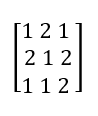


### 1.  **O que representa o coeficiente DFT2D F(0,0) de uma imagem?**
#### O valor de coeficiente DFT2D F(0,0) representa a intensidade média da imagem.


### 2.  **Quantas funções de base teremos para plotar o espectro em magnitude da Fourier 2D deste TI? O que cada uma destas funções de base poderá dar de informação/extrair de informação deste TI?**
#### A fim de plotar o espectro em magnitude da Fourier 2D do TI apresentado, teremos duas funções de base: (no python) fft.fft2() e fft.fftshift():

*  **fft.fft2():** é responsável por realizar o cálculo da transformada de Fourier Discreta bidimensional. A transformada é responsável pela filtragem de imagens no domínio da frequência.
*   **fft.fftshift():** é responsável por mudar o componente de frequência zero para o centro do espectro, a partir dela é possível a aplicação de filtros.


### 3. **Calcule os coeficientes F(u,v), utilizando a DFT2D (faça os cálculos por meio da propriedade da separabilidade da transformada) para este TI. Em seguida, a partir destes coeficientes, plote o espectro de magnitude da DFT2D (lembre-se das propriedades da transformada de Fourier e da função fftshift ao executar este esboço).**

#### Importações

In [ ]:
import cv2
from scipy.fft import fft, fftfreq, ifft
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Usando a propriedade da separabilidade da transformada no trecho de imagem disponibilizado

In [ ]:
# Inicializando o trecho da imagem
ti = np.array([[1,2,1],[2,1,2],[1,1,2]])
print ('Trecho de Imagem \n{}' .format(ti))

Trecho de Imagem 
[[1 2 1]
 [2 1 2]
 [1 1 2]]


In [ ]:
# Usando a abordagem de separabilidade, aplicando a Transformada Discreta de Fourier 1D na linha
linha = np.fft.fft((ti).astype('int64'))
print ('DFT 1D (linha) \n{}' .format(linha))

DFT 1D (linha) 
[[ 4. +0.j        -0.5-0.8660254j -0.5+0.8660254j]
 [ 5. +0.j         0.5+0.8660254j  0.5-0.8660254j]
 [ 4. +0.j        -0.5+0.8660254j -0.5-0.8660254j]]


In [ ]:
# Aplicando a transposta para poder aplicar a DFT 1D na coluna
transposta = linha.T
print('Transposta \n{}' .format(transposta))

Transposta 
[[ 4. +0.j         5. +0.j         4. +0.j       ]
 [-0.5-0.8660254j  0.5+0.8660254j -0.5+0.8660254j]
 [-0.5+0.8660254j  0.5-0.8660254j -0.5-0.8660254j]]


In [ ]:
# Aplicando a transformada discreta de Fourier 1D na coluna
coluna = np.fft.fft(transposta)
print ('{}' .format(coluna))

[[13. +0.j         -0.5-0.8660254j  -0.5+0.8660254j ]
 [-0.5+0.8660254j  -0.5-2.59807621j -0.5-0.8660254j ]
 [-0.5-0.8660254j  -0.5+0.8660254j  -0.5+2.59807621j]]


In [ ]:
# Transpondo para chegar no resultado final (DFT 2D)
final = coluna.T
print('Espectro de Magnitude \n{}' .format(final))

Espectro de Magnitude 
[[13. +0.j         -0.5+0.8660254j  -0.5-0.8660254j ]
 [-0.5-0.8660254j  -0.5-2.59807621j -0.5+0.8660254j ]
 [-0.5+0.8660254j  -0.5-0.8660254j  -0.5+2.59807621j]]


### Plotando o espectro de magnitude da DFT2D 

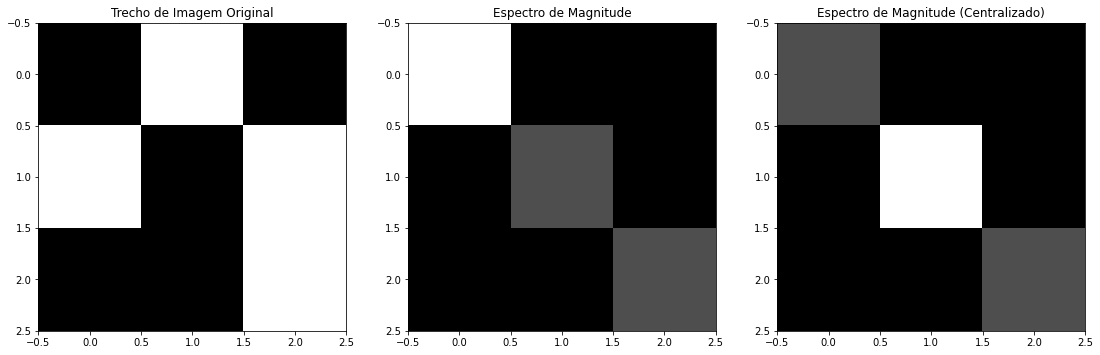

In [ ]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(151)
plt.imshow(np.log(1+np.abs(ti)), "gray")
plt.title("Trecho de Imagem Original")

plt.subplot(152)
plt.imshow(np.log(1+np.abs(final)), "gray")
plt.title("Espectro de Magnitude")

centralizado = np.fft.fftshift(final)
plt.subplot(153)
plt.imshow(np.log(1+np.abs(centralizado)), "gray")
plt.title("Espectro de Magnitude (Centralizado)")

plt.show()

In [80]:
centralizado

array([[-0.5+2.59807621j, -0.5+0.8660254j , -0.5-0.8660254j ],
       [-0.5-0.8660254j , 13. +0.j        , -0.5+0.8660254j ],
       [-0.5+0.8660254j , -0.5-0.8660254j , -0.5-2.59807621j]])